# Orbits in axisymmetric potentials

Figure 7.3 from Chapter 7 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plots two orbits in the effective potential of Equation 7.38:
\begin{equation}
  \Phi_\mathrm{eff}(R,z) = \frac{1}{2} v_0^2 \ln ( R^2 + z^2 / q^2 ) + \frac{j_z^2}{2 R^2}
\end{equation}
for $q=0.8$. Both orbits have the same $j_z$ and $\epsilon$, with $\epsilon = \epsilon_c + v_0^2/2$. The
bounding equipotential contour, where $\Phi_\mathrm{eff} = \epsilon$, is shown as the closed curve. 

Orbits are integrated for time $t \sim 100 R_g / v_0 \sim 100 j_z / v_0^2$. using 
Jo Bovy's [`galpy`](https://github.com/jobovy/galpy), see Bovy, [2015, ApJS, 216, 29](https://ui.adsabs.harvard.edu/abs/2015ApJS..216...29B).  We use `potential.LogarithmicHaloPotential` and
the RK4 integrator (`rk4_c`).

In [16]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# uses galpy

from galpy.orbit import Orbit
from galpy.potential import LogarithmicHaloPotential

# suppress nuisance warnings

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [17]:
plotFile = 'Fig7_3.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Logarithmic halo effective potential

The effective potential for a test mass of specific angular momentum $j_z$ in the logarithmic potential of
Equation 7.37 is
\begin{equation}
  \Phi_{eff}(R,z) = \frac{1}{2}v_0^2\ln\left(R^2 + z^2/q^2\right) + \frac{j_z^2}{2R^2}
\end{equation}
We will compute this for distances $R$ and $z$ scaled to $R_g=j_z/v_0$, so $v_0=1$ and $j_z=1$ in the
equation above.

In [18]:
def effPhi(R,z,q):
    q2 = q*q
    phi = 0.5*np.log(R*R + z*z/q2) + 0.5/(R*R)
    return phi

## Compute effective potential contours

Compute $\Phi_{eff}$ for R=[0.01..10] and z=[-5..+5] for a spherical potential with $q=1$ and an oblate
potential with $q=0.8$

Contour of $\Phi_{eff}$ are spaced by by $\Delta\Phi_{eff}=0.5$ which is 0.5$v_0^2$ in our dimensionless units.

If you change any of the parameters of the computation, uncomment the print statements to
get guidance on how to set the contour levels and spacing.

In [19]:
# plotting limits

rMin = 0.01 # both rho and Phi infinite at R=0
rMax = 10.0
zMin = -5.0 
zMax =  5.0

# setup the grid in R,z coordinates

numPix = 501
Rg = np.linspace(rMin,rMax,numPix)
zg = np.linspace(zMin,zMax,numPix)
R,z = np.meshgrid(Rg,zg)

# oblate potential

q = 0.8
effPhiOblate = effPhi(R,z,q)


### Orbit integration

Use `galpy` with the `LogarithmicHaloPotential` setting `q=0.8` and `rk4_c` RK4 orbit integrator to compute
orbits for times up to $t=100(R_g/v_0)$ in 10,000 steps.  

The orbit originates at R/R$_g$=1, z/R$_g$=0, with normalized velocities for the given potential value of
1.0 in these dimensionless units.

We plot two orbits: one with initial $v_R$>$v_z$ projected along an angle of 22.5 degrees in the R-V plane,
the other with the initial vector rotated 90-degrees so the orbit family is more elongated along z than R.

We compute $v_0$ explicity for the potential using the `vcirc()` method for a potential.

In [20]:
ts = np.linspace(0,100,10000)

phi = LogarithmicHaloPotential(q=0.8)

theta = np.radians(22.5)

R0 = 1.0
z0 = 0.0
v0 = phi.vcirc(R0,z0)

v1 = np.sqrt(0.5)*np.cos(theta) 
v2 = np.sqrt(0.5)*np.sin(theta) 

# orbit 1, launch along vr=v1, vz=v2

o1 = Orbit([R0,v1,v0,z0,v2])
o1.integrate(ts,phi,method='rk4_c')

r1 = o1.R(ts)
z1 = o1.z(ts)

# orbit 2, launch along vr=v2, vz=v1

o2 = Orbit([R0,v2,v0,z0,v1])
o2.integrate(ts,phi,method='rk4_c')

r2 = o2.R(ts)
z2 = o2.z(ts)

## Figure 7.2: side by side format

Left Panel: equipotenital contours in steps of 0.5 for a spherical ($q=1$) potential

Right Panel: equipotential contours in steps of 0.5 for an oblate ($q=0.8$) potential

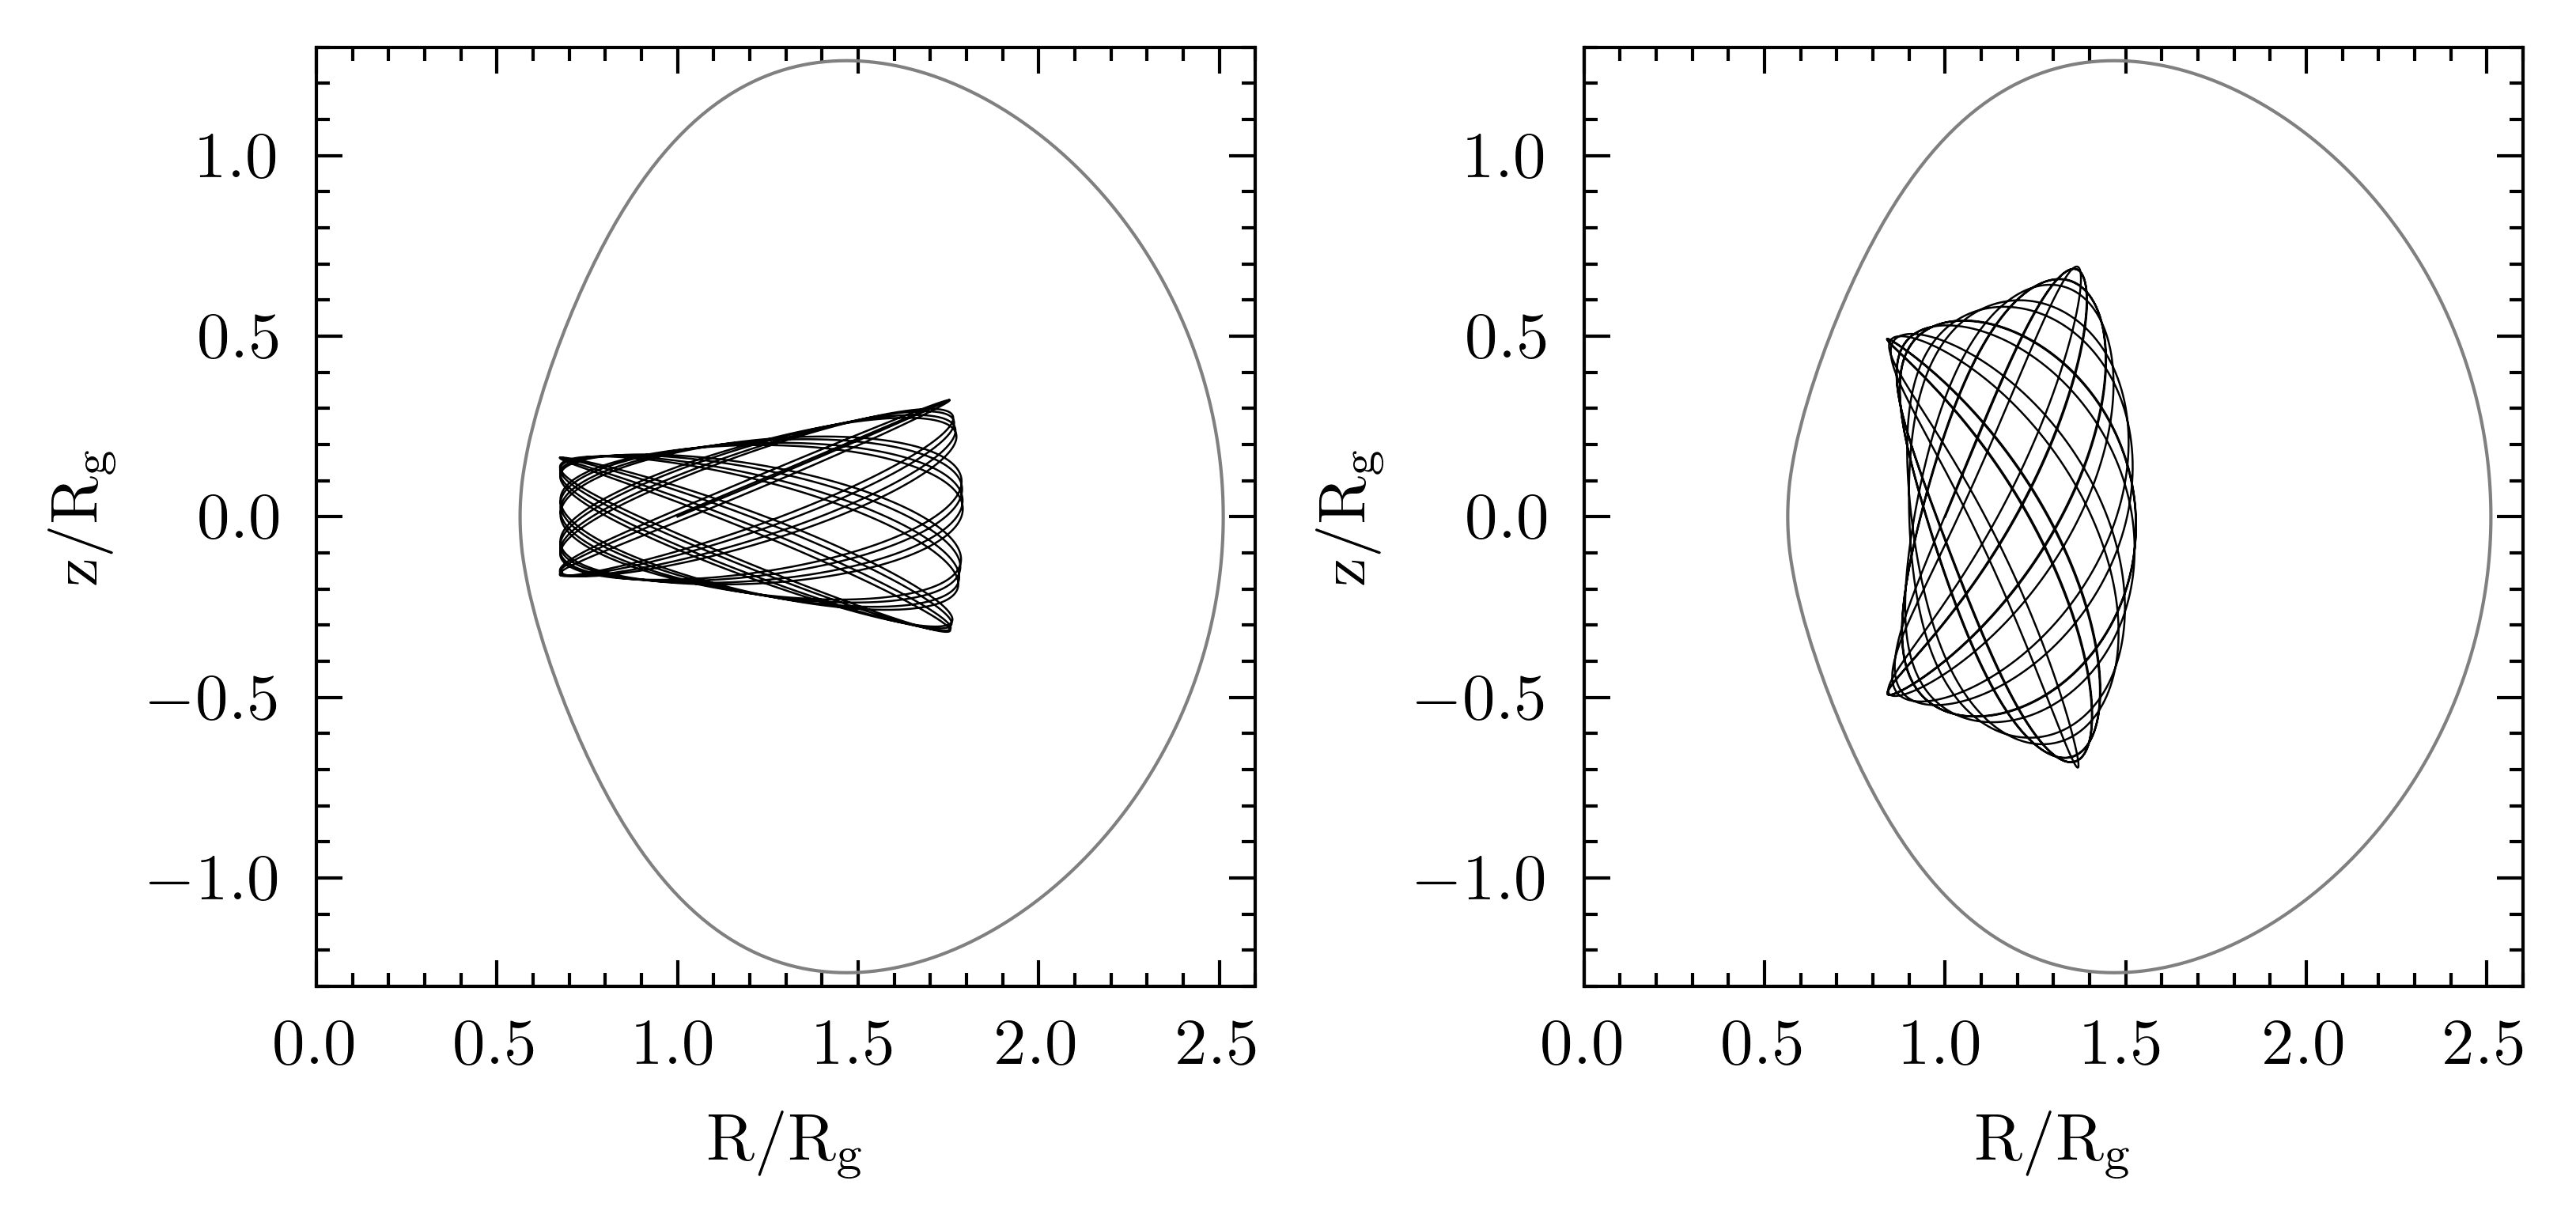

In [21]:
# plotting limits

rMin = 0.0
rMax = 2.6
zMin = -1.3
zMax = 1.3

# Start the plot

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.35, hspace=0.0)

# left panel: orbit set 1

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_aspect('equal')

ax1.set_xlim(rMin,rMax)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.set_xlabel(r'R/R$_{\rm g}$',fontsize=axisFontSize)

ax1.set_ylim(zMin,zMax)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.set_ylabel(r'z/R$_{\rm g}$',fontsize=axisFontSize)

cs = ax1.contour(R,z,effPhiOblate,levels=[1.0],colors=['gray'],linestyles='solid',linewidths=0.5)

ax1.plot(r1,z1,'-',lw=0.3,color='black',zorder=10)

# right panel: orbit set 2

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_aspect('equal')

ax2.set_xlim(rMin,rMax)
ax2.xaxis.set_major_locator(MultipleLocator(0.5))
ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.set_xlabel(r'R/R$_{\rm g}$',fontsize=axisFontSize)

ax2.set_ylim(zMin,zMax)
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.set_ylabel(r'z/R$_{\rm g}$',fontsize=axisFontSize)

cs = ax2.contour(R,z,effPhiOblate,levels=[1.0],colors=['gray'],linestyles='solid',linewidths=0.5)

ax2.plot(r2,z2,'-',lw=0.3,color='black',zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')